This assignment will be reviewed by peers based upon a given rubric. Make sure to keep your answers clear and concise while demonstrating an understanding of the material. Be sure to give all requested information in markdown cells. It is recommended to utilize Latex.

### Problem 1

The Birthday Problem: This is a classic problem that has a nonintuitive answer.  Suppose there are $N$ students in a room.

#### Part a)

What is the probability that at least two of them have the same birthday (month and day)?  (Assume that each day is equally likely to be a student's birthday and that there are no sets of twins.)

Note: Jupyter has two types of cells: Programming and Markdown. Programming is where you will create and run R code. The Markdown cells are where you will type out expalantions and mathematical expressions. [Here](https://www.markdownguide.org/basic-syntax/) is a document on Markdown some basic markdwon syntax. Also feel free to look at the underlying markdown of any of the provided cells to see how we use markdown.

<span style="color:blue">“At least two” is  easier to see the opposite case the “none of them” case \
P(“at least two have same birthday”) = 1 - P(“none of them have same birthday”) \
\
Excluding 29th of February, that is, considering none of the people was born on the leap day of a leap year: \
Whatever the birthday of the first one is, the other has 364 out of 365 days in the year to have a different birthday.
</span>



\begin{align*}
    P(\text{2}) &= 1 - \frac{364}{365}\\
    Similarly, \\
    P(\text{3}) &= 1 - \frac{364}{365} \times \frac{363}{365} \\
    P(\text{4}) &= 1 - \frac{364}{365} \times \frac{363}{365} \times \frac{362}{365} \\
    P(\text{n}) &= 1 - \frac{364!}{(365-n)! \times 365^{n-1}}  \\
    \\
    That is, \\
    P(\text{At least two have same birthday}) &= 1 - P(\text{None of them have same birthday}) \\
    &= 1 - \frac{364!}{(365-n)! \times 365^{n-1}} \:(when \, n < 366)
\end{align*}
\
<span style="color:blue">
When n is equals to or greater than 366, the probability of at least two having same birthday is 1.
</span>

#### Part b)

How large must $N$ be so that the probability that at least two of them have the same birthday is at least 1/2? \
<span style="color:blue">
To simplify above big equation (as R cannot calculate fractional(365) - https://stackoverflow.com/questions/49192128/factorial-with-r ), we take below coarse first-order Taylor approximation as the shortcut:
</span>
\begin{align*}
e^{x} \approx 1+x \\
so \\
1 - \frac{1}{365} \approx e^{-1/365} \\
P(\text{None of them have same birthday}) \: can\:be\:rewritten\:to\:\\
e^{-(1+2+3+\ldots+n)/365}
\end{align*}

<span style="color:blue">
Since adding the numbers 1 to n = n(n + 1)/2, we get
</span>

\begin{align*}
P(\text{None of them have same birthday}) \approx e^{-\frac{n \times (n+1)}{2 \times 365}} \\
so \\
P(\text{At least two have same birthday}) \approx 1 - e^{-\frac{n \times (n+1)}{2 \times 365}} \\
\end{align*}
\
<span style="color:blue">
We would like to use below piece of code to find out how large N must be so that the probability of two having same birthday is at least 1/2 and we can also find when N grows to a value, the probability will be almost equals to 1:
</span>

In [39]:
e=1e-5
for(x in 2:365) {
      y = 1 - exp(-x*(x+1)/(2*365))
      if(abs(y - 0.5) <= e) {
            print(x)
      }
      if(abs(y - 1.0) <= e) {
            print(x)
            break
      }
}

[1] 22
[1] 92


<span style="color:blue">
No so difficult to find out that when N=22 the probability of two having same birthday is at least 1/2 and when N grows to a 92, the probability will be almost equals to 1.
</span>

#### Part c)

Plot the number of students on the $x$-axis versus the probability that at least two of them have the same birthday
on the $y$-axis.

<span style="color:blue">
Please find the plot as below (proven from above that when x >= 92 the probability equals to 1)
</span>

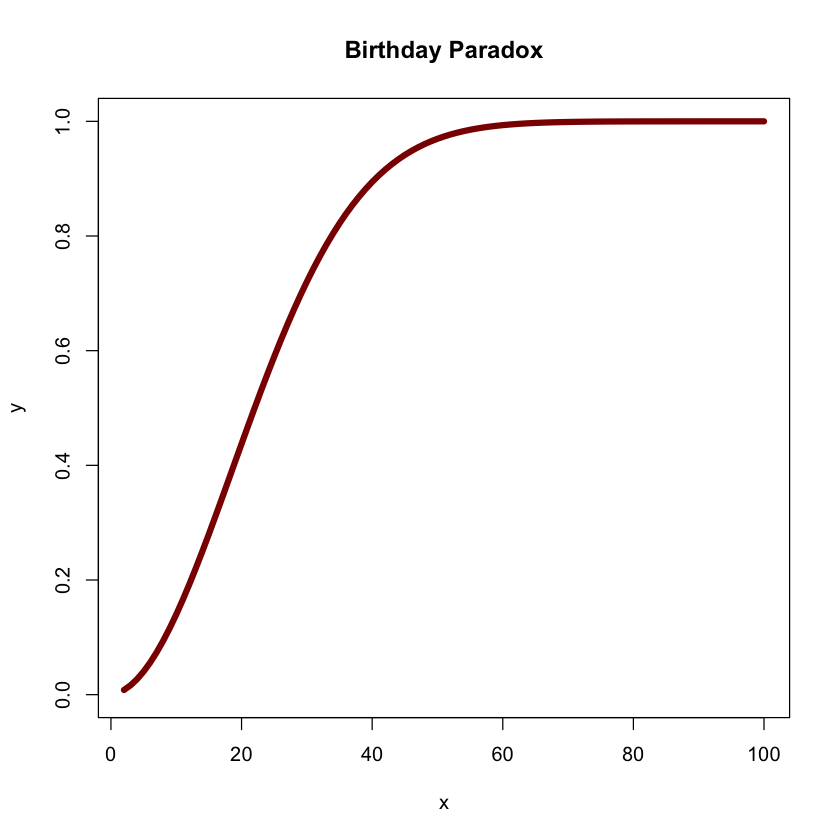

In [3]:
x = 2:100
y = 1 - exp(-x*(x+1)/(2*365))
plot(x, y,
      main = "Birthday Paradox",
     xlab = "x",
      ylab = "y",
      xlim = c(2, 100),
      ylim = c(0, 1),
      type = "l",
      lwd = 5,
     col = "darkred")

#### Thought Question (Ungraded)

Thought question (Ungraded): Would you be surprised if there were 100 students in the room and no two of them had the same birthday?  What would that tell you about that set of students?

<span style="color:blue">
It is still possible when there were 100 students in the class but no two of them had the same birthday for the reasons that one was born on 29th Feb in the leap year so the assumption may not be always true. Other than that it will be quite surprising to observe other cases, perhas the students are very randomly chosen.
</span>

# Problem 2 

One of the most beneficial aspects of R, when it comes to probability, is that it allows us to simulate data and random events. In the following problem, you are going to become familiar with these simulation functions and techniques.

**Part a)** 

Let $X$ be a random variable for the number rolled on a fair, six-sided die. How would we go about simulating $X$?

Start by creating a list of numbers [1, 6]. Then use the `sample()` function with our list of numbers to simulate **a single** roll of the die, as in simulate $X$. We would recommend looking at the documentation for `sample()`, found [here](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample), or by executing `?sample` in a Jupyter cell.

In [34]:
# Your Code Here
# Setting seed for reproductivity
# Return 1 random number out of 6 to simulate single roll of the die
roll.the.fair.die = function() {
    return(sample(1:6, size = 1, replace = TRUE))
}

**Part b)** 

In our initial problem, we said that $X$ comes from a fair die, meaning each value is equally likely to be rolled. Because our die has $6$ sides, each side should appear about $1/6^{th}$ of the time. How would we confirm that our simulation is fair?

What if we generate multiple instances of $X$? That way, we could compare if the simulated probabilities match the theoretical probabilities (i.e. are all $1/6$).

Generate $12$ instances of $X$ and calculate the proportion of occurances for each face. Do your simulated results appear to come from a fair die? Now generate $120$ instances of $X$ and look at the proportion of each face. What do you notice?

Note: Each time you run your simulations, you will get different values. If you want to guarantee that your simulation will result in the same values each time, use the `set.seed()` function. This function will allow your simulations to be reproducable.

In [35]:
set.seed(112358)
# Your Code 
# Setting seed for reproductivity
# Test with 12 instances
counter = c(0,0,0,0,0,0)
for (i in 1:12) {
    value = roll.the.fair.die()
    counter[value] = counter[value] + 1
}
print(round(counter/12,2))

counter = c(0,0,0,0,0,0)
for (i in 1:120) {
    value = roll.the.fair.die()
    counter[value] = counter[value] + 1
}
print(round(counter/120,2))

[1] 0.08 0.25 0.25 0.17 0.08 0.17
[1] 0.18 0.15 0.22 0.17 0.14 0.13


<span style="color:blue">
In the testcase with 12 instances of X, the propotion of occurances for each face are not all as close as to the theoretical probability which is 1/6 (approx. 0.17). e.g., the first and fifth are only about half of the theoretical probability.
    
Whereas the testcase with 120 instances of X shows the propotion of occurance for each face are much closer to the theoretical probability 0.17.
</span>

**Part c)** 

What if our die is not fair? How would we simulate that?

Let's assume that $Y$ comes from an unfair six-sided die, where $P(Y=3)=1/2$ and all other face values have an equal probability of occuring. Use the `sample()` function to simulate this situation. Then display the proportion of each face value, to confirm that the faces occur with the desired probabilities. Make sure that $n$ is large enough to be confident in your answer.

In [36]:
# Your Code Here
roll.the.unfair.die = function() {
    isThree = sample(0:1, size = 1, replace = TRUE)
    if(isThree==1) {
        return(3) #P(Y=3) = 1/2
    } else {
        return(sample(c(1,2,4,5,6), size = 1, replace = TRUE))
    }
}

counter = c(0,0,0,0,0,0)
for (i in 1:1200) {
    value = roll.the.unfair.die()
    counter[value] = counter[value] + 1
}
print(round(counter/1200,2))

[1] 0.12 0.10 0.50 0.08 0.10 0.10


<span style="color:blue">
In the testcase of 1200 instances of unfair die rolled, we observe P(Y=3) = 1/2 and rest of the 5 faces have probabilies around 0.1 and add up to 0.5.
    
We conclude this unfair six-sided die works as expected.
</span>